# Experiment 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from cycler import cycler
import matplotlib.font_manager as fm
# Paths to the Computer Modern font files
font_paths = {
    'serif': 'assets/fonts/cmunrm.ttf',
    'italic': 'assets/fonts/cmunti.ttf',
    'bold': 'assets/fonts/cmunbx.ttf',
    'bold_italic': 'assets/fonts/cmunbi.ttf'
}

# Add the fonts to Matplotlib
for key, path in font_paths.items():
    fm.fontManager.addfont(path)

# Set the font properties globally
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Monochrome color cycle
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']))
rcParams['axes.prop_cycle'] = monochrome

df = pd.read_csv('final_experiments/experiment_e1_results.csv')

# Convert params column from string to dictionary
df['params'] = df['params'].apply(eval)

# Function to format titles (only first letter capitalized)
def format_title(title):
    return title.capitalize()

# Function to add subfigure labels
def add_subfigure_label(ax, label):
    ax.text(-0.1, 1.1, f'({label})', transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
for i, learner in enumerate(['LOF', 'IF', 'KMeans', 'MP']):
    ax = axs[i // 2, i % 2]
    learner_df = df[df['base_learner'] == learner]
    
    if learner == 'LOF':
        for neighbors in learner_df['params'].apply(lambda x: x['neighbors']).unique():
            data = learner_df[learner_df['params'].apply(lambda x: x['neighbors'] == neighbors)]
            ax.plot(data['params'].apply(lambda x: x['windowSize']), data['ucr_score'], 
                     label=f'neighbors={neighbors}')
    elif learner == 'KMeans':
        for n_clusters in learner_df['params'].apply(lambda x: x['n_clusters']).unique():
            data = learner_df[learner_df['params'].apply(lambda x: x['n_clusters'] == n_clusters)]
            ax.plot(data['params'].apply(lambda x: x['windowSize']), data['ucr_score'], 
                     label=f'n_clusters={n_clusters}')
    else:  # This covers both IF and MP
        ax.plot(learner_df['params'].apply(lambda x: x['windowSize']), learner_df['ucr_score'], 
                 label=learner)
    
    ax.set_title(f'{learner.upper()} performance')
    ax.set_xlabel('Window size')
    ax.set_ylabel('UCR score')
    ax.legend()
    add_subfigure_label(ax, chr(97 + i))  # 'a', 'b', 'c', 'd'

fig.suptitle(format_title('Performance of base learners'), fontsize=16)
plt.tight_layout()
plt.savefig('final_visualisations/experiment_1/line_plots.png', format='png', dpi=300, bbox_inches='tight')
plt.close()


fig, ax = plt.subplots(figsize=(12, 8))
markers = {'LOF': 'o', 'IF': 's', 'KMeans': '^', 'MP': 'D'}
for learner in df['base_learner'].unique():
    learner_df = df[df['base_learner'] == learner]
    ax.scatter(learner_df['computational_time'], learner_df['ucr_score'], 
               marker=markers[learner], label=learner, alpha=0.7)

ax.set_xlabel('Computational time')
ax.set_ylabel('UCR score')
ax.set_title(format_title('Performance vs computational time'))
ax.legend()
plt.savefig('final_visualisations/experiment_1/scatter_plot.png', format='png', dpi=300, bbox_inches='tight')
plt.close()


fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='base_learner', y='ucr_score', data=df, ax=ax,
            palette=['lightgrey']*len(df['base_learner'].unique()),
            medianprops={"color": "black"},
            flierprops={"markerfacecolor": "grey", "markersize": 5})

ax.set_title(format_title('Distribution of UCR scores by base learner'))
ax.set_xlabel('Base learner')
ax.set_ylabel('UCR score')
plt.savefig('final_visualisations/experiment_1/box_plot.png', format='png', dpi=300, bbox_inches='tight')
plt.close()

fig, ax = plt.subplots(figsize=(10, 6))
best_scores = df.groupby('base_learner')['ucr_score'].max()
best_scores.plot(kind='bar', ax=ax)
ax.set_title(format_title('Best UCR scores by base learner'))
ax.set_xlabel('Base learner')
ax.set_ylabel('UCR score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('final_visualisations/experiment_1/best_ucr_scores_bar.png', format='png', dpi=300, bbox_inches='tight')
plt.close()


/tmp/ipykernel_3925/4032457020.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='base_learner', y='ucr_score', data=df, ax=ax,


In [2]:
# import os
# # Load annotations
# annotations = pd.read_csv('appendices/annotations.csv')
# annotations['timeseries'] = annotations['timeseries'].str.replace('.csv', '')

# def load_results(model_class):
#     results = []
#     for file in os.listdir('final_results'):
#         if file.startswith(model_class) and file.endswith('.csv'):
#             with open(os.path.join('final_results', file), 'r') as f:
#                 header = f.readline().strip().split(',')
#                 values = f.readline().strip().split(',')
#                 algorithm_info = dict(zip(header, values))
#                 f.readline()
#                 df = pd.read_csv(f)
            
#             df['model'] = algorithm_info['algorithm_name']
#             df['overall_accuracy'] = float(algorithm_info['accuracy'])
#             results.append(df)
    
#     return pd.concat(results, ignore_index=True) if results else pd.DataFrame()

# # Load results for each model class
# model_classes = ['if', 'mp', 'km', 'lof']
# all_results = pd.concat([load_results(mc) for mc in model_classes], ignore_index=True)

# # Merge results with annotations
# merged_data = pd.merge(all_results, annotations, left_on='ts_name', right_on='timeseries')

# # Function to plot average correct for each anomaly type
# def plot_average_correct_by_anomaly_type(df, model_class, ax, axes):
#     # Group by anomaly_type and calculate the mean of correct and total
#     avg_data = df[df['model'].str.startswith(model_class)].groupby('anomaly_type').agg({
#         'correct': 'mean',
#         'total': 'mean'  # The total should be the same for each anomaly type across all models
#     }).sort_values('total', ascending=True)
    
#     # Create horizontal bar plots
#     ax.barh(avg_data.index, avg_data['total'], color='lightgrey',  label='Total anomalies')
#     bars = ax.barh(avg_data.index, avg_data['correct'], color='black', label='Average correct detections')
    
#     # Annotate the bars with the average correct value
#     for i, (anomaly_type, row) in enumerate(avg_data.iterrows()):
#         ax.text(row['correct']+0.1, i, f'{row["correct"]/row["total"]:.2f}', va='center', ha='left')
    
#     ax.set_title(f'{model_class.upper()} models')
#     if ax in axes[-2:]:
#         ax.set_xlabel('Number of anomalies')
#     if ax in [axes[0], axes[2]]:
#         ax.set_ylabel('Anomaly type')
#     if ax not in axes[-2:]:
#         ax.set_xticklabels([])
#     if ax not in [axes[0], axes[2]]:
#         ax.set_yticklabels([])

# # Create 2x2 subplot
# fig, axes = plt.subplots(2, 2, figsize=(20, 16))
# axes = axes.flatten()  # Flatten the 2x2 array to make indexing easier
# fig.suptitle(format_title('Performance of base learners across anomaly types'), fontsize=16)

# for i, mc in enumerate(model_classes):
#     plot_average_correct_by_anomaly_type(performance, mc, axes[i], axes)
#     add_subfigure_label(axes[i], chr(97 + i))  # 'a', 'b', 'c', 'd'

# plt.tight_layout()
# plt.savefig('final_visualisations/experiment_1/base_learner_performance_by_anomaly_type.png', format='png', dpi=300, bbox_inches='tight')
# plt.close()


In [3]:
import pandas as pd
import os
import glob

# Load annotations
annotations = pd.read_csv('appendices/annotations.csv')
annotations['timeseries'] = annotations['timeseries'].str.replace('.csv', '')

# Function to load results for a single file
def load_single_result(file_path):
    with open(file_path, 'r') as f:
        # Read header
        header = f.readline().strip().split(',')
        values = f.readline().strip().split(',')
        algorithm_info = dict(zip(header, values))
        
        # Skip '###' line
        f.readline()
        
        # Read the rest as CSV
        df = pd.read_csv(f)
    
    df['model'] = algorithm_info['algorithm_name']
    df['overall_accuracy'] = float(algorithm_info['accuracy'])
    df['total_time'] = float(algorithm_info['total_time'])
    return df

# Load all results
all_results = []
for file_path in glob.glob('final_results/*.csv'):
    all_results.append(load_single_result(file_path))

# Combine all results
all_results_df = pd.concat(all_results, ignore_index=True)

# Merge results with annotations
merged_data = pd.merge(all_results_df, annotations, left_on='ts_name', right_on='timeseries')

# Calculate performance metrics
performance = merged_data.groupby(['model', 'anomaly_type']).agg({
    'status': lambda x: (x == 'correct').sum(),
    'processing_time': 'mean',
    'ts_name': 'count'  # This gives us the total count for each group
}).reset_index()

performance.columns = ['model', 'anomaly_type', 'correct', 'avg_processing_time', 'total']

# Calculate accuracy
performance['accuracy'] = performance['correct'] / performance['total']

# Function to select best model
def select_best_model(group):
    best = group.loc[group['accuracy'].idxmax()]
    if (group['accuracy'] == best['accuracy']).sum() > 1:
        # If there's a tie, select the one with lowest avg_processing_time
        best = group.loc[group['accuracy'] == best['accuracy']].sort_values('avg_processing_time').iloc[0]
    return best

# Find best model for each anomaly type
best_models = performance.groupby('anomaly_type').apply(select_best_model).reset_index(drop=True)

# Sort by anomaly type for better readability
best_models = best_models.sort_values('anomaly_type')

# Select and rename columns for the output
output_columns = {
    'anomaly_type': 'Anomaly Type',
    'model': 'Best Model',
    'accuracy': 'Accuracy',
    'avg_processing_time': 'Avg. Processing Time (s)',
    'correct': 'Correct Detections',
    'total': 'Total Instances'
}

best_models_output = best_models[output_columns.keys()].rename(columns=output_columns)

# Round numerical values
best_models_output['Accuracy'] = best_models_output['Accuracy'].round(4)
best_models_output['Avg. Processing Time (s)'] = best_models_output['Avg. Processing Time (s)'].round(4)

# Save to CSV
best_models_output.to_csv('final_visualisations/experiment_1/best_models_by_anomaly_type.csv', index=False)

print("Best models for each anomaly type have been saved to 'final_visualisations/experiment_1/best_models_by_anomaly_type.csv'")

# Display the results
best_models_output.sort_values(by='Total Instances', ascending=False)

Best models for each anomaly type have been saved to 'final_visualisations/experiment_1/best_models_by_anomaly_type.csv'


,Anomaly Type,Best Model,Accuracy,Avg. Processing Time (s),Correct Detections,Total Instances
4,local_peak,lof_w200_n20,0.8889,26.7603,24,27
2,frequency_change,mp_w160,0.6538,0.3650,17,26
16,unusual_pattern,lof_w50_n20,0.6400,11.4193,16,25
0,amplitude_change,mp_w160,0.6667,0.4621,16,24
7,noise,lof_w100_n10,0.8696,1.9508,20,23
9,reversed,lof_w25_n10,0.7826,0.6863,18,23
8,outlier,km_w50_k50,1.0000,0.7258,23,23
14,time_shift,mp_w200,0.5909,0.6060,13,22
3,local_drop,km_w50_k100,0.6667,0.8881,14,21
6,missing_peak,lof_w100_n50,0.7143,0.4921,10,14


# Experiment 2

In [4]:


# Paths to the Computer Modern font files
font_paths = {
    'serif': 'assets/fonts/cmunrm.ttf',
    'italic': 'assets/fonts/cmunti.ttf',
    'bold': 'assets/fonts/cmunbx.ttf',
    'bold_italic': 'assets/fonts/cmunbi.ttf'
}

# Add the fonts to Matplotlib
for key, path in font_paths.items():
    fm.fontManager.addfont(path)

# Set the font properties globally
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Monochrome color cycle
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']))
rcParams['axes.prop_cycle'] = monochrome

# Function to format titles (only first letter capitalized)
def format_title(title):
    return title.capitalize()

# Function to add subfigure labels
def add_subfigure_label(ax, label):
    ax.text(-0.1, 1.1, f'({label})', transform=ax.transAxes, fontsize=14, fontweight='bold', va='top')

# ... rest of your code

# Helper function to create unique method names
def get_unique_method_name(method, params):
    if method == 'wv_ols_r2':
        return f"wv_ols_r2_{str(params.get('emphasize_diversity', False))[0]}"
    elif method == 'hard_voting':
        return f"hard_voting_{str(params.get('gaussian', False))[0]}"
    elif params:
        param_str = '_'.join(f"{k}_{v}" for k, v in sorted(params.items()))
        return f"{method}_{param_str}"
    return method

# Load the data
e1_results = pd.read_csv('final_experiments/experiment_e1_results.csv')
e2_results = pd.read_csv('final_experiments/experiment_e2_results.csv')
e2_summary = pd.read_csv('final_experiments/experiment_e2_summary.csv')

# Load configurations
with open('final_experiments/experiment_e2_configurations.json', 'r') as f:
    e2_configs = json.load(f)

# Create unique method names
e2_results['unique_method'] = e2_results.apply(lambda row: get_unique_method_name(row['ensemble_method'], json.loads(row['method_params'])), axis=1)
e2_summary['unique_method'] = e2_summary.apply(lambda row: get_unique_method_name(row['ensemble_method'], json.loads(row['method_params'])), axis=1)

# Calculate relative performance and processing time for each ensemble
relative_performances = []
for config in e2_configs:
    bl_type = config['base_learner_type']
    method = config['ensemble_method']
    rep = config['repetition']
    constituent_scores = []
    constituent_times = []
    for params in config['base_learner_params']:
        base_learner_data = e1_results[(e1_results['base_learner'] == bl_type) & 
                                       (e1_results['params'] == str(params))]
        constituent_scores.append(base_learner_data['ucr_score'].values[0])
        constituent_times.append(base_learner_data['computational_time'].values[0])
    avg_constituent_score = np.mean(constituent_scores)
    max_constituent_time = max(constituent_times)  # Assuming parallel execution
    unique_method = get_unique_method_name(method, config['method_params'])
    ensemble_data = e2_results[(e2_results['base_learner_type'] == bl_type) & 
                               (e2_results['unique_method'] == unique_method) & 
                               (e2_results['repetition'] == rep)]
    ensemble_score = ensemble_data['ucr_score'].values[0]
    ensemble_time = ensemble_data['computational_time'].values[0]
    relative_score = ensemble_score / avg_constituent_score
    relative_time = ensemble_time / max_constituent_time
    relative_performances.append({
        'base_learner_type': bl_type,
        'unique_method': unique_method,
        'repetition': rep,
        'relative_score': relative_score,
        'ensemble_score': ensemble_score,
        'avg_constituent_score': avg_constituent_score,
        'relative_time': relative_time,
        'ensemble_time': ensemble_time,
        'max_constituent_time': max_constituent_time
    })

relative_df = pd.DataFrame(relative_performances)

# 1. Comparative Box Plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
base_learners = e2_results['base_learner_type'].unique()
all_data = []
for i, bl in enumerate(base_learners):
    ax = axs[i // 2, i % 2]
    data = []
    labels = []
    for method in relative_df['unique_method'].unique():
        method_data = relative_df[(relative_df['base_learner_type'] == bl) & 
                                  (relative_df['unique_method'] == method)]['relative_score']
        data.append(method_data)
        all_data.extend(method_data)
        labels.append(method)
    ax.boxplot(data, labels=labels)
    ax.axhline(y=1, color='k', linestyle='--')
    ax.set_title(f'{bl.upper()} - ensemble methods')
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylabel('Relative score')
    add_subfigure_label(ax, chr(97 + i))  # 'a', 'b', 'c', 'd'

# Set the same y-axis limits for all subplots
y_min = min(0.9, np.min(all_data))
y_max = max(1.1, np.max(all_data))
for ax in axs.flatten():
    ax.set_ylim(y_min, y_max)

fig.suptitle(format_title('Comparative performance of ensemble methods'), fontsize=16)
plt.tight_layout()
plt.savefig('final_visualisations/experiment_2/comparative_box_plots.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.close()

# 2. Performance Improvement Heatmap
improvement_data = relative_df.groupby(['base_learner_type', 'unique_method'])['relative_score'].mean().reset_index()
improvement_pivot = improvement_data.pivot(index='base_learner_type', columns='unique_method', values='relative_score')
improvement_pivot = (improvement_pivot - 1) * 100  # Convert to percentage improvement

fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(improvement_pivot, annot=True, fmt='.2f', cmap='Greys_r', ax=ax)  # Note the '_r' for reversed colormap

ax.set_title(format_title('Average performance improvement of ensemble methods (%)'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# add_subfigure_label(ax, 'a')

plt.tight_layout()
plt.savefig('final_visualisations/experiment_2/performance_improvement_heatmap.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.close()

# 3. Processing Time Comparison Heatmap
time_data = relative_df.groupby(['base_learner_type', 'unique_method'])['relative_time'].mean().reset_index()
time_pivot = time_data.pivot(index='base_learner_type', columns='unique_method', values='relative_time')

fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(time_pivot, annot=True, fmt='.2f', cmap='Greys_r', ax=ax)

ax.set_title(format_title('Average processing time increase of ensemble methods'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# add_subfigure_label(ax, 'b')

plt.tight_layout()
plt.savefig('final_visualisations/experiment_2/processing_time_comparison_heatmap.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.close()

# 4. Absolute UCR Scores Box Plot
fig, ax = plt.subplots(figsize=(20, 10))

data = []
labels = []
for method in e2_results['unique_method'].unique():
    method_data = e2_results[e2_results['unique_method'] == method]['ucr_score']
    data.append(method_data)
    labels.append(method)

bp = ax.boxplot(data, labels=labels)

# Customize the box plot
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='black')

ax.set_title(format_title('Distribution of UCR scores by ensemble method'))
ax.set_xlabel('Ensemble method')
ax.set_ylabel('UCR score')
ax.set_xticklabels(labels, rotation=45, ha='right')

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('final_visualisations/experiment_2/absolute_ucr_scores_boxplot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.close()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/tmp/ipykernel_3925/2592063145.py:144: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('final_visualisations/experiment_2/performance_improvement_heatmap.pdf', format='pdf', dpi=300, bbox_inches='tight')
/tmp/ipykernel_3925/2592063145.py:144: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('final_visualisations/experiment_2/performance_improvement_heatmap.pdf', format='pdf', dpi=300, bbox_inches='tight')


# Experiment 3

In [5]:


# Helper function to create unique method names
def get_unique_method_name(method, params):
    if method == 'wv_ols_r2':
        return f"wv_ols_r2_{str(params.get('emphasize_diversity', False))[0]}"
    elif method == 'hard_voting':
        return f"hard_voting_{str(params.get('gaussian', False))[0]}"
    elif params:
        param_str = '_'.join(f"{k}_{v}" for k, v in sorted(params.items()))
        return f"{method}_{param_str}"
    return method

# Load the data
e1_results = pd.read_csv('final_experiments/experiment_e1_results.csv')
e3_results = pd.read_csv('final_experiments/experiment_e3_results.csv')

# Load configurations
with open('final_experiments/experiment_e3_configurations.json', 'r') as f:
    e3_configs = json.load(f)

# Create unique method names
e3_results['unique_method'] = e3_results.apply(lambda row: get_unique_method_name(row['ensemble_method'], json.loads(row['method_params'])), axis=1)

# Calculate relative processing time for each ensemble
relative_times = []
for config in e3_configs:
    method = config['ensemble_method']
    rep = config['repetition']
    constituent_times = []
    for bl_type, params in config['base_learner_params']:
        base_learner_data = e1_results[(e1_results['base_learner'] == bl_type) & 
                                       (e1_results['params'] == str(params))]
        constituent_times.append(base_learner_data['computational_time'].values[0])
    max_constituent_time = max(constituent_times)  # Assuming parallel execution
    unique_method = get_unique_method_name(method, config['method_params'])
    ensemble_data = e3_results[(e3_results['unique_method'] == unique_method) & 
                               (e3_results['repetition'] == rep)]
    ensemble_time = ensemble_data['computational_time'].values[0]
    relative_time = ensemble_time / max_constituent_time
    relative_times.append({
        'unique_method': unique_method,
        'repetition': rep,
        'relative_time': relative_time,
        'ensemble_time': ensemble_time,
        'max_constituent_time': max_constituent_time
    })

relative_df = pd.DataFrame(relative_times)

# Calculate average relative time and standard error for each method
avg_relative_times = relative_df.groupby('unique_method')['relative_time'].agg(['mean', 'sem']).reset_index()

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
ax.bar(avg_relative_times['unique_method'], avg_relative_times['mean'], 
       yerr=avg_relative_times['sem'], capsize=5, color='lightgrey', edgecolor='black')

# Add horizontal dotted line at y=1
ax.axhline(y=1, color='k', linestyle=':', linewidth=1)

ax.set_title('Average processing time increase of heterogeneous ensemble methods')
ax.set_xlabel('Ensemble method')
ax.set_ylabel('Relative processing time')
ax.set_xticklabels(avg_relative_times['unique_method'], rotation=45, ha='right')

# Adjust y-axis to start from 0
ax.set_ylim(bottom=0)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('final_visualisations/experiment_3/processing_time_comparison_barplot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.close()

/tmp/ipykernel_3925/1845397.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg_relative_times['unique_method'], rotation=45, ha='right')


In [6]:
# Load the data
e1_results = pd.read_csv('final_experiments/experiment_e1_results.csv')
e3_results = pd.read_csv('final_experiments/experiment_e3_results.csv')
e2_results = pd.read_csv('final_experiments/experiment_e2_results.csv')

# Create unique method names for both e2 and e3 results
e3_results['unique_method'] = e3_results.apply(lambda row: get_unique_method_name(row['ensemble_method'], json.loads(row['method_params'])), axis=1)
e2_results['unique_method'] = e2_results.apply(lambda row: get_unique_method_name(row['ensemble_method'], json.loads(row['method_params'])), axis=1)

# Load configurations
with open('final_experiments/experiment_e3_configurations.json', 'r') as f:
    e3_configs = json.load(f)

# Calculate relative performance for each ensemble
relative_performances = []
for config in e3_configs:
    method = config['ensemble_method']
    rep = config['repetition']
    constituent_scores = [e1_results[(e1_results['base_learner'] == bl_type) & 
                                     (e1_results['params'] == str(params))]['ucr_score'].values[0]
                          for bl_type, params in config['base_learner_params']]
    avg_constituent_score = np.mean(constituent_scores)
    unique_method = get_unique_method_name(method, config['method_params'])
    ensemble_data = e3_results[(e3_results['ensemble_method'] == method) & 
                               (e3_results['repetition'] == rep)]
    ensemble_score = ensemble_data['ucr_score'].values[0]
    relative_score = ensemble_score / avg_constituent_score
    relative_performances.append({
        'unique_method': unique_method,
        'repetition': rep,
        'relative_score': relative_score,
        'ensemble_score': ensemble_score,
        'avg_constituent_score': avg_constituent_score
    })

relative_df = pd.DataFrame(relative_performances)

# Plot 1: Box plot of performance ratios for heterogeneous ensembles
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x='unique_method', y='relative_score', data=relative_df, ax=ax, color='lightgrey')
ax.axhline(y=1, color='k', linestyle='--')
ax.set_title(format_title('Performance ratios of heterogeneous ensembles'))
ax.set_xlabel('Ensemble method')
ax.set_ylabel('Relative score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('final_visualisations/experiment_3/heterogeneous_performance_ratios.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.close()

# Plot 2: Boxplot comparison of homogeneous vs heterogeneous ensembles (overall)
fig, ax = plt.subplots(figsize=(10, 8))

hetero_data = e3_results['ucr_score']
homo_data = e2_results['ucr_score']

data = [hetero_data, homo_data]
labels = ['Heterogeneous', 'Homogeneous']

bp = ax.boxplot(data, labels=labels, patch_artist=True)

for patch in bp['boxes']:
    patch.set_facecolor('lightgrey')

for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='black')

ax.set_title(format_title('UCR scores: overall homogeneous vs heterogeneous ensembles'))
ax.set_xlabel('Ensemble type')
ax.set_ylabel('UCR score')

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)


plt.tight_layout()
plt.savefig('final_visualisations/experiment_3/overall_homo_vs_hetero_ucr_scores.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.close()

# Plot 3: Boxplot comparison of homogeneous vs heterogeneous ensembles
fig, ax = plt.subplots(figsize=(15, 10))

data = []
labels = []
for method in e3_results['unique_method'].unique():
    hetero_data = e3_results[e3_results['unique_method'] == method]['ucr_score']
    homo_data = e2_results[e2_results['unique_method'] == method]['ucr_score']
    data.extend([hetero_data, homo_data])
    labels.extend([f"{method}\nHetero", f"{method}\nHomo"])

bp = ax.boxplot(data, labels=labels)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='black')

ax.set_title(format_title('UCR scores: homogeneous vs heterogeneous ensembles'))
ax.set_xlabel('Ensemble method')
ax.set_ylabel('UCR score')
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('final_visualisations/experiment_3/homo_vs_hetero_ucr_scores.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.close()

/tmp/ipykernel_3925/2322869836.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# Experiment 4

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Assuming your data is in a DataFrame called 'lof_mp_results'

# plt.figure(figsize=(10, 6))
# ax = sns.barplot(x='unique_method', y='ucr_score', data=lof_mp_results, 
#                  color='lightgray', edgecolor='black')

# # Add the dashed line for best base learner
# ax.axhline(y=0.620, color='darkgray', linestyle='--', label='Best base learner')

# # Customize the plot
# ax.set_title('Performance of LOF-MP Ensemble Methods', fontsize=16)
# ax.set_xlabel('Ensemble Method', fontsize=12)
# ax.set_ylabel('UCR Score', fontsize=12)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# # Set y-axis range from 0 to 1
# ax.set_ylim(0, 1)

# # Add value labels on top of each bar
# for i, v in enumerate(lof_mp_results['ucr_score']):
#     ax.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# # Add legend within the plot
# ax.legend(loc='upper right')

# plt.tight_layout()
# plt.savefig('final_visualisations/experiment_4/lof_mp_ensemble_performance.pdf', format='pdf', dpi=300, bbox_inches='tight')
# plt.close()

# Experiment 5

In [ ]:

# Load the best models data
best_models_df = pd.read_csv('final_visualisations/experiment_1/best_models_by_anomaly_type.csv')
best_models_df = best_models_df.drop(columns=['Avg. Processing Time (s)'])
# best_models_df.drop(labels='Avg. Processing Time (s)')
# Create a formatted table for LaTeX
latex_table = best_models_df.to_latex(index=False, caption="Best Base Learners by anomaly type", label="tab:best_base_learners")

# Save the LaTeX table to a file
with open('final_visualisations/experiment_5/best_base_learners_table.tex', 'w') as f:
    f.write(latex_table)

# Optionally, create a more readable version for your appendix
readable_table = best_models_df.to_string(index=False)

# Save the readable table to a text file
with open('final_visualisations/experiment_5/best_base_learners_table.txt', 'w') as f:
    f.write(readable_table)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib.font_manager as fm
from matplotlib import rcParams
from cycler import cycler

# Paths to the Computer Modern font files
font_paths = {
    'serif': 'assets/fonts/cmunrm.ttf',
    'italic': 'assets/fonts/cmunti.ttf',
    'bold': 'assets/fonts/cmunbx.ttf',
    'bold_italic': 'assets/fonts/cmunbi.ttf'
}

# Add the fonts to Matplotlib
for key, path in font_paths.items():
    fm.fontManager.addfont(path)

# Set the font properties globally
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Monochrome color cycle
monochrome = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']))
rcParams['axes.prop_cycle'] = monochrome

# Load the results
results_df = pd.read_csv('final_experiments/experiment_e5_results.csv')

# Function to create a unique method name
def get_unique_method_name(method, params):
    if method == 'wv_ols_r2':
        return f"wv_ols_r2_{str(json.loads(params).get('emphasize_diversity', False))[0]}"
    elif method == 'hard_voting':
        return f"hard_voting_{str(json.loads(params).get('gaussian', False))[0]}"
    return method

# Create unique method names
results_df['unique_method'] = results_df.apply(lambda row: get_unique_method_name(row['ensemble_method'], row['method_params']), axis=1)

# Set up the plot
plt.figure(figsize=(12, 6))

results_df = results_df.drop([1, 2, 3], axis=0)

# Create the bar plot
ax = sns.barplot(x='unique_method', y='ucr_score', data=results_df, 
                 color='lightgrey', edgecolor='black')

# Customize the plot
plt.title('UCR scores of ensemble methods for best models by anomaly type', fontsize=18)
plt.xlabel('Ensemble method', fontsize=14)
plt.ylabel('UCR score', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(results_df['ucr_score']):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig('final_visualisations/experiment_5/ensemble_ucr_scores.pdf', dpi=300, bbox_inches='tight')
plt.close()

print("Bar plot saved as 'final_visualisations/experiment_5/ensemble_ucr_scores.pdf'")

Bar plot saved as 'final_visualisations/experiment_5/ensemble_ucr_scores.pdf'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

# Load the results
results_df = pd.read_csv('final_experiments/experiment_e5_results.csv')

# Function to create a unique method name
def get_unique_method_name(method, params):
    if method == 'wv_ols_r2':
        return f"wv_ols_r2_{str(json.loads(params).get('emphasize_diversity', False))[0]}"
    elif method == 'hard_voting':
        return f"hard_voting_{str(json.loads(params).get('gaussian', False))[0]}"
    return method

# Create unique method names
results_df['unique_method'] = results_df.apply(lambda row: get_unique_method_name(row['ensemble_method'], row['method_params']), axis=1)
# results_df
results_df = results_df.drop(index=[1,2,3])

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='unique_method', y='ucr_score', data=results_df, 
                 color='lightgray', edgecolor='black')

# Add the dashed line for best base learner (assuming 0.620 is the best score from Experiment 1)
# best_base_learner_score = 0.620  # Replace with actual best score from Experiment 1
# ax.axhline(y=best_base_learner_score, color='darkgray', linestyle='--', label='Best base learner')

# Customize the plot
ax.set_title('UCR scores of ensemble methods for best models by anomaly type', fontsize=16)
ax.set_xlabel('Ensemble method', fontsize=12)
ax.set_ylabel('UCR score', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(False)

# Set y-axis range from 0 to 1
ax.set_ylim(0, 1)

# Add value labels on top of each bar
for i, v in enumerate(results_df['ucr_score']):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# Add legend within the plot
# ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('final_visualisations/experiment_5/ensemble_ucr_scores.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.close()

# print("Bar plot saved as 'final_visualisations/experiment_5/ensemble_ucr_scores.png'")

/tmp/ipykernel_58602/1479956686.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# Illustrations

5291 5492


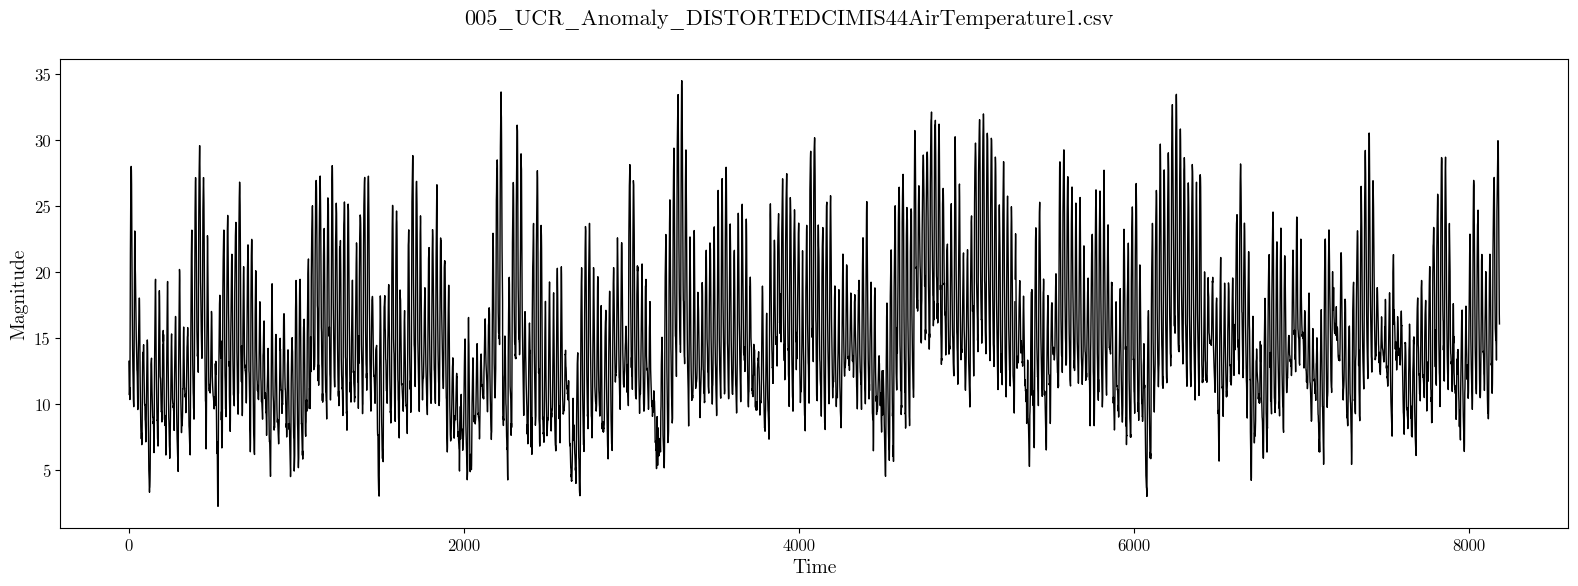

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from dataloader import DataLoader

# Load data
data_loader = DataLoader()
ts = data_loader.load_file('ucrdata/005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature1.csv')

# Combine train and test data
combined_data = np.concatenate([ts.trainData, ts.testData])

# Define anomaly range
anomaly_start = ts.trainLength + ts.anomalies[0].start
anomaly_end = ts.trainLength + ts.anomalies[0].end
print(anomaly_start, anomaly_end)

# Define a range around the anomaly
range_window = 7000  # Adjust this value to control how much data around the anomaly to show
plot_start = max(0, anomaly_start - range_window)
plot_end = min(len(combined_data), anomaly_end + range_window)

# Plotting
plt.figure(figsize=(16, 6))  # Adjusted figure size for a clearer view
plt.suptitle('005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature1.csv', fontsize=16, color='black')
plt.xlabel('Time', fontsize=14, color='black')
plt.ylabel("Magnitude", fontsize=14, color='black')

# Plot the data around the anomaly
# Normal data before the anomaly
plt.plot(range(plot_start, anomaly_start), combined_data[plot_start:anomaly_start], color='black', linewidth=1, label='Normal Data')

# Anomalous data with a dotted line
plt.plot(range(anomaly_start, anomaly_end + 1), combined_data[anomaly_start:anomaly_end + 1], color='black', linestyle='solid', linewidth=1)

# Normal data after the anomaly (connect directly from the end of anomaly)
plt.plot(range(anomaly_end + 1, plot_end), combined_data[anomaly_end + 1:plot_end], color='black', linestyle='solid', linewidth=1)

# Set the axis color to black
plt.gca().spines['top'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')

# plt.legend()
plt.tight_layout()
plt.savefig('final_visualisations/illustrations/example_time_series.pdf', format='pdf')
plt.show()

